https://thebook.io/080324/part05/ch19/04/

4. 이미지의 특징을 추출하는 오토인코더  
최근엔 오토인코더는 점점 안쓰는 추세..

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [5]:
autoencoder = models.Sequential()
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1),
                              activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu', 
                              strides=2))


autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)          

shape의 변화가 관건

In [8]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, 
                validation_data=(X_test, X_test))
# X_train, X_train = input, target

Epoch 1/50
469/469 [==============================] - 84s 177ms/step - loss: 0.2213 - val_loss: 0.1336
Epoch 2/50
469/469 [==============================] - 83s 178ms/step - loss: 0.1252 - val_loss: 0.1184
Epoch 3/50
469/469 [==============================] - 83s 176ms/step - loss: 0.1154 - val_loss: 0.1113
Epoch 4/50
469/469 [==============================] - 84s 179ms/step - loss: 0.1103 - val_loss: 0.1069
Epoch 5/50
469/469 [==============================] - 83s 176ms/step - loss: 0.1067 - val_loss: 0.1039
Epoch 6/50
469/469 [==============================] - 83s 176ms/step - loss: 0.1040 - val_loss: 0.1015
Epoch 7/50
469/469 [==============================] - 86s 183ms/step - loss: 0.1019 - val_loss: 0.0995
Epoch 8/50
469/469 [==============================] - 86s 184ms/step - loss: 0.1001 - val_loss: 0.0980
Epoch 9/50
469/469 [==============================] - 86s 183ms/step - loss: 0.0987 - val_loss: 0.0967
Epoch 10/50
469/469 [==============================] - 84s 180ms/step - l

313/313 [==============================] - 1s 3ms/step


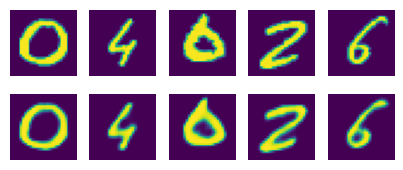

In [9]:
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

# 랜덤으로 뽑아 원본 vs 오토인코딩 이미지 비교
for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()